## Part 1: Exploratory Data Analysis of Logins
In this notebook I will explore, visualize, and summarize the data in the provided logins.json file, which contains timestamps of user logins in a particular geographic location.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
logins_path = "../Takehome_challenge_3/logins.json"


In [3]:
logins_df = pd.read_json(logins_path)
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Right away, I'm wondering of the year is a mistake. I'm guessing these logins are not actually from 1970. I would ask the data engineer or stakeholder to confirm the date range that this data should be in.

In [5]:
# need datetime to be index of df to use resample
#logins_df.index = pd.to_datetime(logins_df.index, unit='s')


In [6]:
# add column filled with 1's to indicate 1 login per timestamp
logins_df['count'] = 1
logins_df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
logins_agg = logins_df.resample('15min',on='login_time',origin='start').sum()
logins_agg.head()

,count
login_time,
1970-01-01 20:12:16,8
1970-01-01 20:27:16,8
1970-01-01 20:42:16,6
1970-01-01 20:57:16,3
1970-01-01 21:12:16,3


In [8]:
logins_agg.describe()

,count
count,9788.000000
mean,9.515938
std,8.353281
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,71.000000


In [19]:
# let's look at a scatter plot of the time series count data:
def ts_plot(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df['count'], 
            linestyle='-', linewidth=0.8, color = 'blue',alpha = 0.4)
    ax.set_xlabel('Time')
    ax.set_ylabel('Login counts per 15 minutes', color='black')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    #plt.legend()
    plt.title("15-minute Aggregated Logins")
    plt.show()

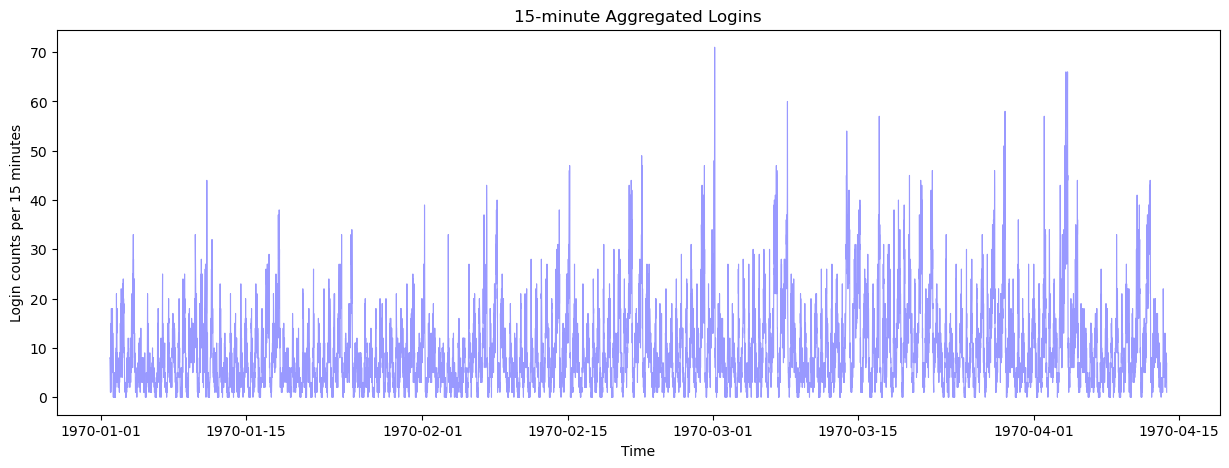

In [20]:
ts_plot(logins_agg)

That looks pretty cluttered. Let's try a 1-hour aggregation and see if that looks better.

In [11]:
logins_hour_agg = logins_df.resample('1h',on='login_time',origin='start').sum()
logins_hour_agg.head()

,count
login_time,
1970-01-01 20:12:16,25
1970-01-01 21:12:16,17
1970-01-01 22:12:16,26
1970-01-01 23:12:16,54
1970-01-02 00:12:16,52


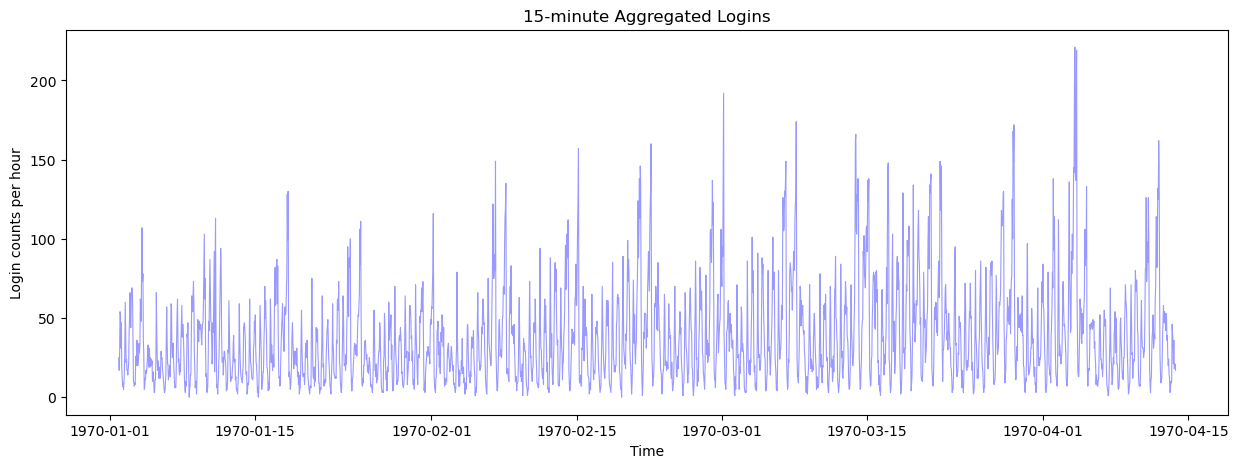

In [18]:
fig, ax = plt.subplots()
ax.plot(logins_hour_agg.index, logins_hour_agg['count'], 
         linestyle='-', linewidth=0.8, color = 'blue',alpha = 0.4)
ax.set_xlabel('Time')
ax.set_ylabel('Login counts per hour', color='black')
fig = plt.gcf()
fig.set_size_inches(15,5)
#plt.legend()
plt.title("60-minute Aggregated Logins")
plt.show()

Some seasonality is evident: at this scale it looks like we have spikes in logins on the weekend and lower relative use on weekdays. Detail is not clear at this scale, but it appears there is also a daily seasonality.

Let's take a look at both the 15 min and 60 min aggregations on a one week period:

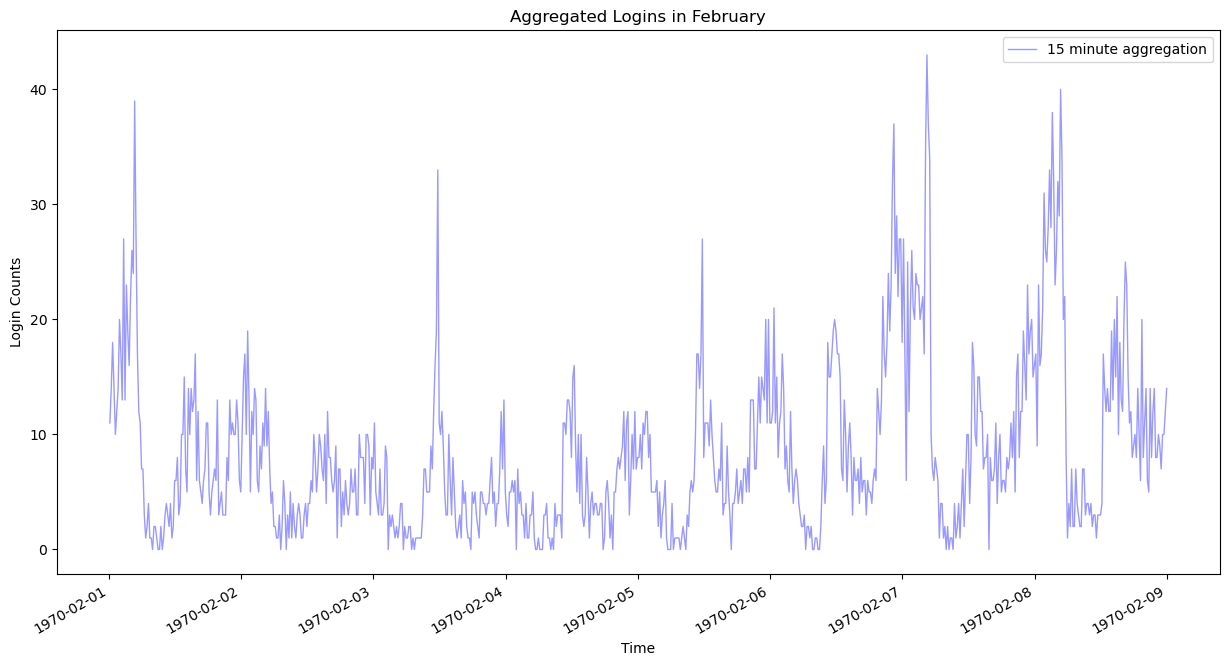

In [16]:
#Let's see what a 1-week period looks like:
logins_agg_1wk = logins_agg.loc['1970-02-01':'1970-02-08']
#logins_hour_agg_2wk = logins_hour_agg.loc['1970-02-01':'1970-02-15']
fig = plt.figure(figsize = (15,8))
logins_agg_1wk['count'].plot(linestyle='-', linewidth=1, label = '15 minute aggregation', color = 'blue',alpha = 0.4)
#logins_hour_agg_2wk['count'].plot(linestyle='-', linewidth=1, label = '1 hour aggregation', color = 'red',alpha = 0.4)

plt.ylabel('Login Counts')
plt.xlabel("Time")
plt.title("Aggregated Logins in February")
plt.legend()
plt.show()

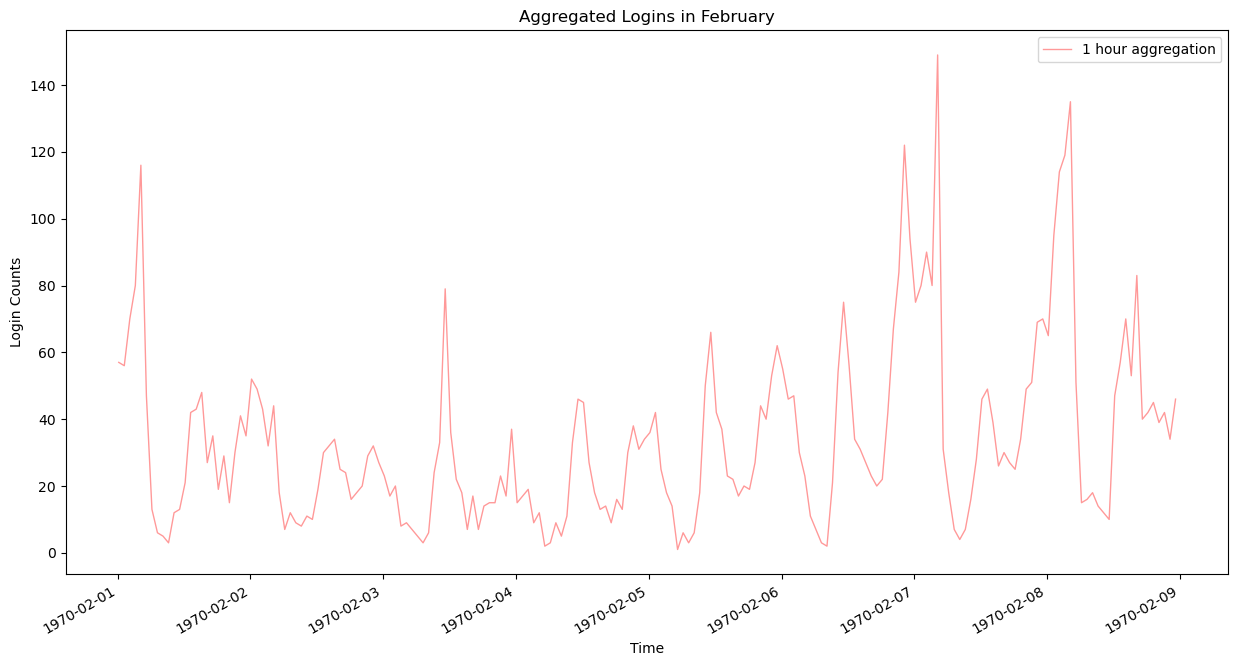

In [15]:
#Let's see what a 1-week period looks like:
#logins_agg_2wk = logins_agg.loc['1970-02-01':'1970-02-15']
logins_hour_agg_1wk = logins_hour_agg.loc['1970-02-01':'1970-02-08']
fig = plt.figure(figsize = (15,8))
#logins_agg_2wk['count'].plot(linestyle='-', linewidth=1, label = '15 minute aggregation', color = 'blue',alpha = 0.4)
logins_hour_agg_1wk['count'].plot(linestyle='-', linewidth=1, label = '1 hour aggregation', color = 'red',alpha = 0.4)

plt.ylabel('Login Counts')
plt.xlabel("Time")
plt.title("Aggregated Logins in February")
plt.legend()
plt.show()

The daily seasonality is evident in the one week plot, but it is still unclear what is ahppening at what times of day. So let's zoom in further and see what a 1 or 2 day period looks like to view the daily seasonality:

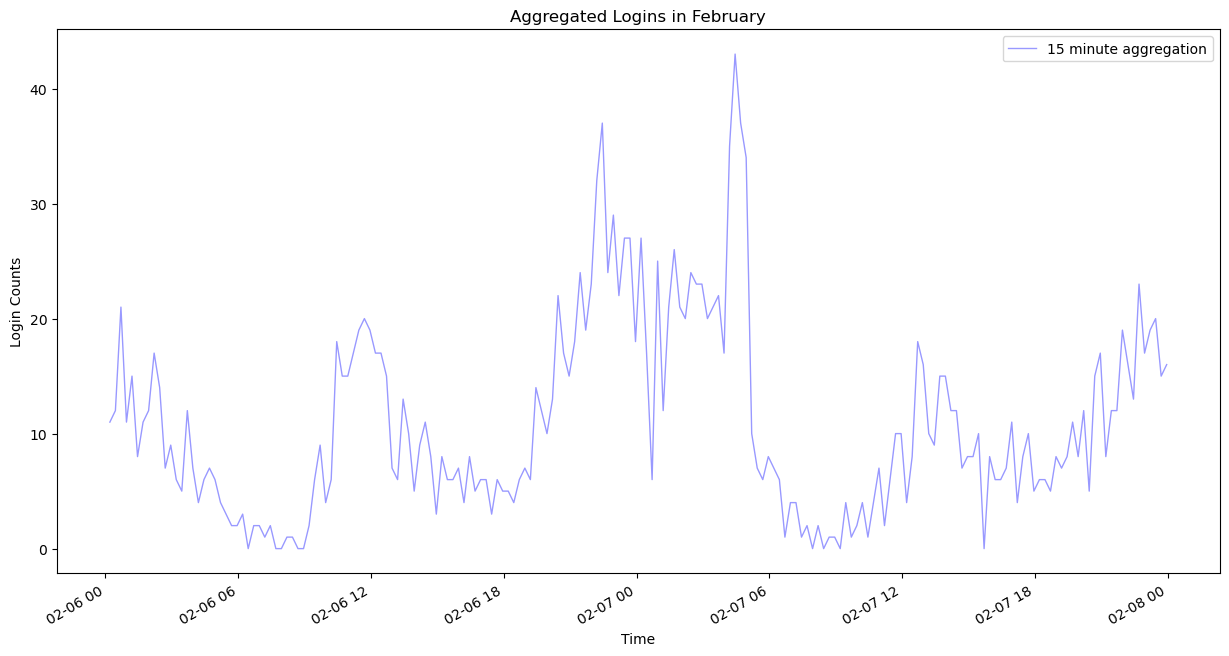

In [17]:
#Let's see what a 2-day period looks like:
logins_agg_2day = logins_agg.loc['1970-02-06':'1970-02-07']
#logins_hour_agg_2wk = logins_hour_agg.loc['1970-02-01':'1970-02-15']
fig = plt.figure(figsize = (15,8))
logins_agg_2day['count'].plot(linestyle='-', linewidth=1, label = '15 minute aggregation', color = 'blue',alpha = 0.4)
#logins_hour_agg_2wk['count'].plot(linestyle='-', linewidth=1, label = '1 hour aggregation', color = 'red',alpha = 0.4)

plt.ylabel('Login Counts')
plt.xlabel("Time")
plt.title("Aggregated Logins in February")
plt.legend()
plt.show()

At the 2-day scale (this 2-day period seems to be capturing a Friday and Saturday, but we are not certain on this since we don't know what year our data is from), we can see that logins are lowest in the morning from about 6am-noon, ramp up a bit around noon, then decrease again in the afternoon, and are highest in the evening and nighttime.  

#### Exploratory data analysis summary:
* There is a data quality issue in that the year of the timestamp for all the data is 1970, which is erroneous.
* The count of logins has weekly and daily seasonality. <br>



## Part 2 - Experiment and Metrics Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**1. Key Measure of Success in this experiment:**
<br>The average wait time for a ride pickup seems like a good **KPI** for measuring success in this situation. From the company's standpoint, the main the purpose behind encouraging partner drivers to be available in both cities would be to make more drivers available in each city during that city's peak demand periods. If wait times are too long due to too few drivers available, riders may choose other means of transportation and Ultimate will miss out on business.

**2. Practical Experiment to compare the effectiveness of the proposed change:**
<br>Before choosing this as our KPI, we'll need to ensure that we have good historical data to compare to. We will need timestamp data for the ride request submission, the geographic location of the request, and the time that a driver picks up the rider (ideally also the time that the drivers accepts the request, but minimally at least the time the driver picks up the rider). So if we do not have good historical data including these variables, we will need to choose a different KPI. An alternative KPI would be simply the total number of rides during peak times in the two cities.<br>
<br>Assuming we have the historical data we need, we can proceed with experiment design:<br>
<br>a) Calculate average wait time for a ride pickup for the different cities during each time of day aggregated by hour or 3-hour block (by time of request submission) with historical data. Then calculate the same metric after Ultimate started reimbursing the toll cost. The longer the trial period, the more data we will have to compare to historical data to tell if the reimbursement is working to reduce wait times.
<br>b) We can do a one-sided significance test to determine if the reimbursement strategy had an effect on average wait time. The null hypothesis is that the average wait time is the same before and after implementation of the toll reimbursement. The alternative hypothesis is that wait time is significantly reduced following the intervention. We will predetermine what p value we want to use for a significance level (perhaps p=0.05). 
<br>c) If the p-value is less than our predetermined value indicating significance, then we can say that the average wait time is shorter following the reimbursement intervention.